<a href="https://colab.research.google.com/github/JhonCastillo25/VisionComputacional/blob/main/Yolo_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE I: USANDO PYTORCH YOLO V3 

JHON JAIRO CASTILLO CIFUENTES

JUAN CAMILO TOBAR

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir /content/drive/MyDrive/AdvDL221  #creamos un directorio

mkdir: cannot create directory ‘/content/drive/MyDrive/AdvDL221’: File exists


In [ ]:
%ls

drive/  sample_data/


In [ ]:
#Entrando al directorio
%cd /content/drive/MyDrive/AdvDL221/ 
#Listar archivos y folders
%ls 

/content/drive/MyDrive/AdvDL221
playing-card-dataset/  Pytorch-YOLOv3/


In [ ]:
!git clone https://github.com/promach/Pytorch-YOLOv3

Cloning into 'Pytorch-YOLOv3'...
remote: Enumerating objects: 796, done.
remote: Total 796 (delta 0), reused 0 (delta 0), pack-reused 796
Receiving objects: 100% (796/796), 16.25 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (458/458), done.


In [ ]:
%cd Pytorch-YOLOv3/
%ls


/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3
 assets/                      LICENSE             plot_yolo_log.py    train.py
 checkpoints/                 logs/               __pycache__/        utils/
 config/                      models.py           pytorch-grad-cam/   weights/
'Copia de plot_yolo_log.py'   output/             README.md
 data/                        plot_training.py    requirements.txt
 detect.py                    plot_yolo_log1.py   test.py


In [ ]:
# Montando todos los requisitos para correr YOLO (se montan a partir del archivo texto requirements)
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Montando los pesos que sirven para los difrentes modelos YOLO o Tiny-YOLO
%cd weights/
!bash download_weights.sh

/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/weights
--2022-05-27 23:47:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  57.5MB/s    in 4.1s    

2022-05-27 23:47:18 (57.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2022-05-27 23:47:18--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  50.5MB/s    in 0.7s    

2022-05-27 23:47:18 (50.5 MB/s) -

In [ ]:
%cd /content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/
%ls

/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3
 assets/                      detect.py   plot_yolo_log.py   train.py
 checkpoints/                 LICENSE     __pycache__/       utils/
 config/                      logs/       README.md          weights/
'Copia de plot_yolo_log.py'   models.py   requirements.txt
 data/                        output/     test.py


In [ ]:
#Probando el detector original sobre ejemplos
!python3 detect.py --image_folder data/samples/

Namespace(batch_size=1, checkpoint_model=None, class_path='data/coco.names', conf_thres=0.8, image_folder='data/samples/', img_size=416, model_def='config/yolov3.cfg', n_cpu=0, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.914880
	+ Batch 1, Inference Time: 0:00:00.510561
	+ Batch 2, Inference Time: 0:00:00.467795
	+ Batch 3, Inference Time: 0:00:00.438789
	+ Batch 4, Inference Time: 0:00:00.477860
	+ Batch 5, Inference Time: 0:00:00.950242
	+ Batch 6, Inference Time: 0:00:00.333290
	+ Batch 7, Inference Time: 0:00:00.613238
	+ Batch 8, Inference Time: 0:00:00.499992

Saving images:
(0) Image: 'data/samples/dog.jpg'
	+ Label: dog, Conf: 0.99335
	+ Label: bicycle, Conf: 0.99981
	+ Label: truck, Conf: 0.94229
(1) Image: 'data/samples/eagle.jpg'
	+ Label: bird, Conf: 0.99703
(2) Image: 'data/samples/field.jpg'
	+ Label: person, Conf: 0.99996
	+ Label: horse, Conf: 0.99977
	+ Label: dog, Conf: 0.99409
(3) Image: 'dat

In [ ]:
#Listemos archivos con mas informacion (-l) y ocultos (-a)
%ls -al output/

total 2920
-rw------- 1 root root 147165 May 28 14:25 card1.png
-rw------- 1 root root 196481 May 28 14:25 card3.png
-rw------- 1 root root  23054 May 28 14:24 curve.png
-rw------- 1 root root 328574 May 28 16:22 dog.png
-rw------- 1 root root 304347 May 28 16:22 eagle.png
-rw------- 1 root root 298663 May 28 16:22 field.png
-rw------- 1 root root 382933 May 28 16:22 giraffe.png
-rw------- 1 root root 264304 May 28 16:22 herd_of_horses.png
-rw------- 1 root root 243781 May 28 16:22 messi.png
-rw------- 1 root root 183542 May 28 16:22 person.png
-rw------- 1 root root 315629 May 28 16:22 room.png
-rw------- 1 root root 297635 May 28 16:22 street.png


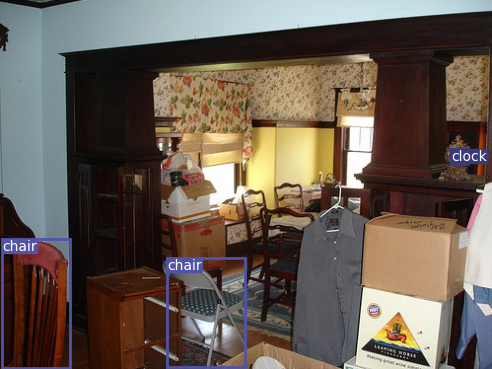

In [ ]:
from IPython.display import Image
Image('output/room.png')

# PARTE II: ENTRENANDO SU PROPIO DATASET


In [ ]:
%ls

 assets/                      detect.py   plot_yolo_log.py   train.py
 checkpoints/                 LICENSE     __pycache__/       utils/
 config/                      logs/       README.md          weights/
'Copia de plot_yolo_log.py'   models.py   requirements.txt
 data/                        output/     test.py


In [ ]:
#paso 1: Navegue a la carpeta config y cree su propia definición de modelo,
#se puede hacer uso del script create_custom_model.sh $$ (donde el signo $$ es reemplazado por el numero de categorías de su dataset)
% cd config/
!bash create_custom_model.sh 52

[Errno 2] No such file or directory: 'config/'
/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/config


Paso 2: Vaya al archivo data/custom/classes.names y adicione los nombres de sus clases.



In [ ]:
#paso 3. Creando o subiendo un dataset (Para este caso vamos a usar uno ya creado acerca de cartas)
#Salgamonos de la carpeta de yolo para no mezclar las dos cosas (originalmente)
%cd ..
%ls

/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3
assets/  detect.py  output/       requirements.txt  utils/
config/  LICENSE    __pycache__/  test.py           weights/
data/    models.py  README.md     train.py


In [ ]:
# Vamos a clonar el dataset que esta en https://github.com/okmd/playing-card-dataset
!git clone https://github.com/okmd/playing-card-dataset 

Cloning into 'playing-card-dataset'...
remote: Enumerating objects: 8820, done.
remote: Total 8820 (delta 0), reused 0 (delta 0), pack-reused 8820
Receiving objects: 100% (8820/8820), 817.01 MiB | 19.94 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (8004/8004), done.


In [ ]:
#Paso 4: Mueva las imagenes desde la carpeta del dataset a la carpeta de YOLO ubicada en data/custom/images
%cd ..
%ls

/content/drive/MyDrive/AdvDL221
Pytorch-YOLOv3/


In [ ]:
!mv playing-card-dataset/cards/*.jpg  Pytorch-YOLOv3/data/custom/images/

In [ ]:
#Paso 5: Mueva el archivo train.txt desde la carpeta del dataset a la carpeta de YOLO ubicada en data/custom
#No olvide cambiar el path de manera que se dirija a data/custom/images/
%ls

playing-card-dataset/  Pytorch-YOLOv3/


In [ ]:
!sed -i 's|data/cards|data/custom/images|' playing-card-dataset/train.txt

In [ ]:
! mv -f playing-card-dataset/train.txt  Pytorch-YOLOv3/data/custom/

In [ ]:
#Paso 6: Mueva sus anotaciones desde la carpeta del dataset a la carpeta de data/custom/labels/
!mv playing-card-dataset/cards/*.txt  Pytorch-YOLOv3/data/custom/labels/

Paso 7. Cree manualmente los archivos de train and valid.

Paso 8. Vaya al archivo config/custom.data y cambie el numero de clases

Paso 9. Entrene la red

**PROBLEMAS A LA HORA DE ENTRENAR**

Pueden presentarse varios problemas
1. Problema de falta de archivos... corra de nuevo requerimientos.
2. Problema con el archivo logger.py
Cambie el contenido por este código:



```
# 
import os
import datetime
from torch.utils.tensorboard import SummaryWriter


class Logger(object):
    def __init__(self, log_dir, log_hist=True):
        """Create a summary writer logging to log_dir."""
        if log_hist:    # Check a new folder for each log should be dreated
            log_dir = os.path.join(
                log_dir,
                datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S"))
        self.writer = SummaryWriter(log_dir)

    def scalar_summary(self, tag, value, step):
        """Log a scalar variable."""
        self.writer.add_scalar(tag, value, step)

    def list_of_scalars_summary(self, tag_value_pairs, step):
        """Log scalar variables."""
        for tag, value in tag_value_pairs:
            self.writer.add_scalar(tag, value, step)
```



3. Problema con container.py index out range Observe que en classes.name haya una linea en blanco al final.
4. En el entrenamiento aparece este warning

*UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  conf_obj = pred_conf[obj_mask].mean()*

Cambie la linea 269:


```
# 
ByteTensor = torch.cuda.ByteTensor if pred_boxes.is_cuda else torch.ByteTensor

```


Por esto:

```
# 
BoolTensor = torch.cuda.BoolTensor if pred_boxes.is_cuda else torch.BoolTensor

```

Y utilicelo es las lineas 278 y 279:
```
# 
obj_mask = BoolTensor(nB, nA, nG, nG).fill_(0)
noobj_mask = BoolTensor(nB, nA, nG, nG).fill_(1)
```




In [ ]:
%cd ..
%ls
%cd Pytorch-YOLOv3/

/content/drive/MyDrive
 AdvDL221/  'capturas presentacion'/  'Colab Notebooks'/   Modelos/
[Errno 2] No such file or directory: 'Pytorch-YOLOv3/'
/content/drive/MyDrive


In [ ]:
#Cerciorese de estar en el directorio base de Pytorch YOLO
%cd /content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3
%ls

/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3
assets/  detect.py  output/       requirements.txt  utils/
config/  LICENSE    __pycache__/  test.py           weights/
data/    models.py  README.md     train.py


In [ ]:
!python3 train.py --model_def config/config-tiny-CBAM-52.cfg --data config/custom.data --pretrained_weights weights/yolov3-tiny.weights --epochs 100

Se han truncado las últimas 5000 líneas del flujo de salida.
Total loss 6.020261764526367
---- ETA 0:03:42.624050

---- [Epoch 0/100, Batch 173/400] ----
+------------+--------------+--------------+
| Metrics    | YOLO Layer 0 | YOLO Layer 1 |
+------------+--------------+--------------+
| grid_size  | 14           | 28           |
| loss       | 0.644123     | 5.014792     |
| x          | 0.044563     | 0.046166     |
| y          | 0.028735     | 0.043676     |
| w          | 0.040176     | 0.048876     |
| h          | 0.020513     | 0.032659     |
| conf       | 0.411879     | 4.734817     |
| cls        | 0.098257     | 0.108598     |
| cls_acc    | 6.90%        | 3.33%        |
| recall50   | 0.068966     | 0.033333     |
| recall75   | 0.000000     | 0.033333     |
| precision  | 0.060606     | 0.017544     |
| conf_obj   | 0.886928     | 0.753022     |
| conf_noobj | 0.001849     | 0.041876     |
+------------+--------------+--------------+
Total loss 5.6589155197143555
---- E

In [ ]:
!python3 train.py --model_def config/config-tiny.cfg --data config/custom.data --pretrained_weights checkpoints/yolov3_ckpt_86.pth --epochs 50

Se han truncado las últimas 5000 líneas del flujo de salida.
| conf       | 0.008287     | 0.144391     |
| cls        | 0.010399     | 0.007595     |
| cls_acc    | 93.33%       | 96.67%       |
| recall50   | 0.933333     | 0.933333     |
| recall75   | 0.933333     | 0.933333     |
| precision  | 0.933333     | 0.800000     |
| conf_obj   | 0.996993     | 0.949966     |
| conf_noobj | 0.000047     | 0.000264     |
+------------+--------------+--------------+
Total loss 0.19681766629219055
---- ETA 0:00:05.852982

---- [Epoch 16/50, Batch 376/400] ----
+------------+--------------+--------------+
| Metrics    | YOLO Layer 0 | YOLO Layer 1 |
+------------+--------------+--------------+
| grid_size  | 10           | 20           |
| loss       | 0.036472     | 0.045145     |
| x          | 0.003198     | 0.002135     |
| y          | 0.002671     | 0.003002     |
| w          | 0.005064     | 0.004244     |
| h          | 0.006914     | 0.004278     |
| conf       | 0.001433     | 0.01

# PARTE III: USANDO LO APRENDIDO PARA REALIZAR EL LABORATORIO 2

1. **Crear y entrenar un nuevo modelo usando Tiny-YOLO**

* Para este caso usted deberá crear su modelo manualmente, es decir, haga una 
copia del archivo yolov3-tiny.cfg y modifique el nuumero de clases y el numero de filtros)

* Recuerde que la fórmula para obtener el numero de filtros es: 
<font color="red">(# de clases + 5)*3 </font>

* Para entrenar la red recuerde cambiar los pesos pre-entrenados para hacer uso de los referentes a Tiny-YOLO. Use 100 Epocas.

* Para tener un gráfico acerca de las "bondades" del modelo entrenado haremos uso de mAP y Loss. En classroom se deja un archivo llamado plot_yolo.py, en principio este archiv ya esta configurado para salvar un gráfico con las metricas solicitadas, pero usted puede entrar a modificarlo, si asi usted lo considera. 

* Copie el archivo a su directorio base de pytorch yolo
* Use el siguiente código para ejecutarlo desde colab:
```
# !python3 plot_yolo_log.py path_log_eventos
```
La ruta solicitada esta en la carpeta **logs/carpeta_fecha_hora/evento**

* Una vez ejecutado revise que se ha credo un archivo llamado **curve.png** en la carpeta **outputs** . Cambiele el nombre porque este archivo se sobreescribirá cada vez que sea ejecutado el código en cuestión.

* Además de generar el gráfico, este ejecutable tiene un segundo próposito que es encontrar la época en la cual fue alcanzado el máximo mAP en el entrenamiento. Busque en la carpeta **checkpoints** el archivo relacionado con esa época y cambiele el nombre porque estos archivos se sobreescribiran cada vez que un nuevo entrenamiento sea realizado. La razón para cambiar y guardar este archivo , es poruqe este contiene los pesos del modelo entrenado y que serán luego usados en la inferencia.


2.   **Crear y entrenar un nuevo modelo usando Tiny-YOLO + Módulo SE**
* Las instrucciones serán explicadas en clase pero ustedes pueden querer "adelantar" trabajo, para lo cual sugiero seguir las indicaciones dadas en este tutorial: https://www.codetd.com/en/article/8929128

3.   **Crear y entrenar un nuevo modelo usando Tiny-YOLO + Módulo CBAM**
* Las instrucciones serán explicadas en clase pero ustedes pueden querer "adelantar" trabajo, para lo cual sugiero seguir las indicaciones dadas en este tutorial: https://www.codetd.com/en/article/8929128
4.   **Comparando los modelos basados en las métricas: mAP , Loss y GradCAM**
* La integración de GradCAM queda como adenda investigativa.


In [ ]:
%ls

 assets/                      detect.py   plot_yolo_log.py   train.py
 checkpoints/                 LICENSE     __pycache__/       utils/
 config/                      logs/       README.md          weights/
'Copia de plot_yolo_log.py'   models.py   requirements.txt
 data/                        output/     test.py


In [ ]:

!python3 plot_yolo_log1.py /content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/logs/2022_05_29__21_01_22/events.out.tfevents.1653858085.e8bcbc37ef83.422.0

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['loss_1', 'x_1', 'y_1', 'w_1', 'h_1', 'conf_1', 'cls_1', 'cls_acc_1', 'recall50_1', 'recall75_1', 'precision_1', 'conf_obj_1', 'conf_noobj_1', 'loss_2', 'x_2', 'y_2', 'w_2', 'h_2', 'conf_2', 'cls_2', 'cls_acc_2', 'recall50_2', 'recall75_2', 'precision_2', 'conf_obj_2', 'conf_noobj_2', 'loss', 'val_precision', 'val_recall', 'val_mAP', 'val_f1'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
100
100
Los pasos son: 100
Los pasos1 son: 100
0 : mAP 0.00798102468252182
1 : mAP 0.010702493600547314
2 : mAP 0.01096312329173088
3 : mAP 0.017060574144124985
4 : mAP 0.016440292820334435
5 : mAP 0.02153479866683483
6 : mAP 0.03273164480924606
7 : mAP 0.02956147864460945
8 : mAP 0.04145676642656326
9 : mAP 0.059139955788850784
10 : mAP 0.07818649709224701
11 : mAP 0.0734829530119896
12 : mAP 0.10382352769374847
13 : mAP 0.10628805309534073
14 : mAP 0.139720156788826
15 : mAP 0.12762413918972015


In [ ]:
!python3 detect.py  --model_def config/config-tiny-CBAM-52.cfg --weights_path checkpoints/YoloCBAM_Mejor.pth --image_folder data/samples-mio/ --class_path data/custom/classes.names --conf_thres 0.5 


Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.5, image_folder='data/samples-mio/', img_size=416, model_def='config/config-tiny-CBAM-52.cfg', n_cpu=0, nms_thres=0.4, weights_path='checkpoints/YoloCBAM_Mejor.pth')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.070357
	+ Batch 1, Inference Time: 0:00:00.039801
	+ Batch 2, Inference Time: 0:00:00.031091
	+ Batch 3, Inference Time: 0:00:00.026390
	+ Batch 4, Inference Time: 0:00:00.011749
	+ Batch 5, Inference Time: 0:00:00.017925
	+ Batch 6, Inference Time: 0:00:00.014075
	+ Batch 7, Inference Time: 0:00:00.041524
	+ Batch 8, Inference Time: 0:00:00.041187
	+ Batch 9, Inference Time: 0:00:00.023422
	+ Batch 10, Inference Time: 0:00:00.021922
	+ Batch 11, Inference Time: 0:00:00.010898
	+ Batch 12, Inference Time: 0:00:00.011310

Saving images:
(0) Image: 'data/samples-mio/card1.jpg'
	+ Label: 10H, Conf: 0.88680
	+ Label: 10S, Conf: 0.84518
	+ Label: 10H, Conf: 0.83247

In [ ]:
!git clone https://github.com/jacobgil/pytorch-grad-cam.git

fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.


In [ ]:
!pip install grad-cam



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.8 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.9-py3-none-any.whl size=25984 sha256=5f9f0ec02de0a7ffb6e21904f1d767c46353324968c92a69b291d97b1943be64
  Stored in directory: /root/.cache/pip/wheels/65/e8/6e/6eedfbe3f0007dfd8116e6820b69691c4103d89ad2ae8c69ff
Successfully built grad-cam


In [ ]:
import cv2
import numpy as np
from torchvision import transforms
from PIL import Image

In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from matplotlib import pyplot as plt



In [ ]:
!pip install pytorch-gradcam


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.0 MB 4.6 MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5269 sha256=37440b11a56e2b42420368f5487bd9705d0d3999825e5c18f0e684a5e56d66c7
  Stored in directory: /root/.cache/pip/wheels/06/e7/da/b13a71980c3a787414e5ff8e156701c561c6322636396d71cc
Successfully built pytorch-gradcam


In [ ]:
import torch
from models import Darknet

#modelo1 YOLOv3

path="/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/checkpoints/YoloMejor_V2.pth"
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set up model

model= Darknet('/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/config/config-tiny.cfg',img_size=480)
model.load_state_dict(torch.load(path))
model.cpu()
#modelo2 squeeze

path2="/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/checkpoints/YoloSqueezeMejor.pth"
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set up model

model2= Darknet('/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/config/config-tiny-SE-52.cfg',img_size=480)
model2.load_state_dict(torch.load(path2))
model2.cpu()

#modelo 3 cbam

path3="/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/checkpoints/YoloCBAM_Mejor.pth"
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set up model

model3= Darknet('/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/config/config-tiny-CBAM-52.cfg',img_size=480)
model3.load_state_dict(torch.load(path3))
model3.cpu()



Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (maxpool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (conv_4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_4): BatchNorm2d(64, eps=1e-05, momentum=0.9, aff

In [ ]:
model.module_list[-2]

Sequential(
  (conv_22): Conv2d(256, 171, kernel_size=(1, 1), stride=(1, 1))
)

In [ ]:
model2.module_list[-2]


Sequential(
  (conv_24): Conv2d(256, 171, kernel_size=(1, 1), stride=(1, 1))
)

In [ ]:
model3.module_list[-2]

Sequential(
  (conv_24): Conv2d(256, 171, kernel_size=(1, 1), stride=(1, 1))
)

In [ ]:
target_layers = [model.module_list[-2].conv_22]
target_layers2 = [model2.module_list[-2].conv_24]
target_layers3 = [model3.module_list[-2].conv_24]


In [ ]:
image_URL= "/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/data/samples-mio/card13.jpg"
img = cv2.imread(image_URL)
img = cv2.resize(img,(480,480))
rgb_img = img.copy()
img = np.float32(img)/255
transform = transforms.ToTensor()
tensor = transform(img).unsqueeze(0)

In [ ]:
cam1 = EigenCAM(model,target_layers,use_cuda=False)
grayscale_cam1 = cam1(tensor)[0,:,:]
cam_image1= show_cam_on_image(img,grayscale_cam1,use_rgb=True)
ImagenYOLO=Image.fromarray(cam_image1)


In [ ]:
cam2 = EigenCAM(model2,target_layers2,use_cuda=False)
grayscale_cam2 = cam2(tensor)[0,:,:]
cam_image2= show_cam_on_image(img,grayscale_cam2,use_rgb=True)
ImagenSE=Image.fromarray(cam_image2)

In [ ]:
cam3 = EigenCAM(model3,target_layers3,use_cuda=False)
grayscale_cam3 = cam3(tensor)[0,:,:]
cam_image3= show_cam_on_image(img,grayscale_cam3,use_rgb=True)
ImagenCBAM=Image.fromarray(cam_image3)

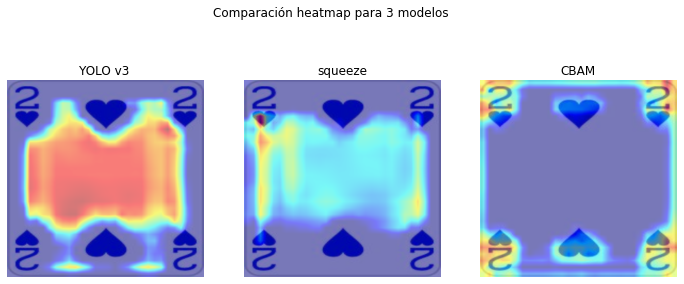

In [ ]:
fig=plt.figure(figsize=(12,5))
subplot=fig.add_subplot(1,3,1)
plt.imshow(ImagenYOLO)
plt.title("YOLO v3 ")
plt.axis('off')

subplot=fig.add_subplot(1,3,2)
plt.imshow(ImagenSE)
plt.title("squeeze")
plt.axis('off')

subplot=fig.add_subplot(1,3,3)
plt.imshow(ImagenCBAM)
plt.title("CBAM")
plt.axis('off')

fig.suptitle("Comparación heatmap para 3 modelos")
plt.show()


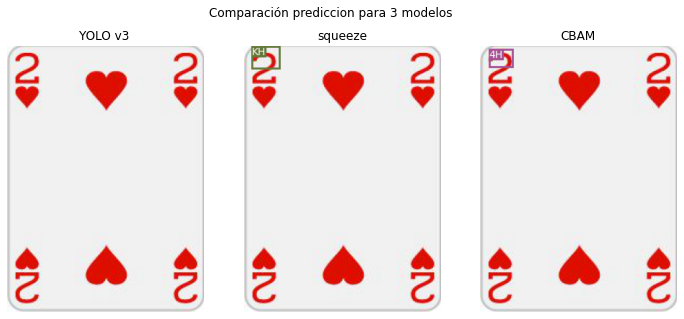

In [ ]:
fig=plt.figure(figsize=(12,5))
subplot=fig.add_subplot(1,3,1)
a=cv2.imread("/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/output/predict_yolo/card13.png")
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
plt.title("YOLO v3 ")
plt.axis('off')

subplot=fig.add_subplot(1,3,2)
b=cv2.imread("/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/output/predict_SE/card13.png")
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
plt.title("squeeze")
plt.axis('off')

subplot=fig.add_subplot(1,3,3)
c=cv2.imread("/content/drive/MyDrive/AdvDL221/Pytorch-YOLOv3/output/predict_CBAM/card13.png")
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))
plt.title("CBAM")
plt.axis('off')

fig.suptitle("Comparación prediccion para 3 modelos")
plt.show()
